# Load database

In [7]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
from dotenv import load_dotenv

In [8]:
# Carregar variáveis de ambiente do arquivo .env
load_dotenv()

# Obter caminhos do arquivo csv e do diretório de extração das variáveis de ambiente
transacoes_path = os.getenv('TRANSACOES_CSV')

In [9]:
# Carregar o CSV em um DataFrame Pandas
df_transacoes = pd.read_csv(transacoes_path)

# Verificar as primeiras linhas do DataFrame para garantir que os dados foram carregados corretamente
df_transacoes.head()


,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao
0,3100,256,2020-05-22 03:15:21 UTC,Saque,-130.0
1,28405,256,2021-06-29 11:52:38 UTC,Saque,-255.0
2,1776,512,2020-05-17 13:04:50 UTC,Saque,-250.0
3,14311,512,2020-09-06 02:55:34 UTC,Saque,-80.0
4,25012,512,2020-10-16 09:26:52 UTC,Saque,-475.0


**Análise inicial do Dataframe**

In [181]:
df_transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71999 entries, 0 to 71998
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cod_transacao    71999 non-null  int64  
 1   num_conta        71999 non-null  int64  
 2   data_transacao   71999 non-null  object 
 3   nome_transacao   71999 non-null  object 
 4   valor_transacao  71999 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.7+ MB


In [182]:
df_transacoes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cod_transacao,71999.0,36000.000000,20784.465353,1.0,18000.50,36000.00,53999.50,71999.0
num_conta,71999.0,499.486632,288.907850,1.0,249.00,499.00,749.00,999.0
valor_transacao,71999.0,357.025159,6550.523464,-132100.0,-121.87,-39.81,-12.86,480270.0


**Verificar dados faltantes**

In [183]:
df_transacoes.isna().any()

cod_transacao      False
num_conta          False
data_transacao     False
nome_transacao     False
valor_transacao    False
dtype: bool

**Resumo Estatístico das Transações Financeiras**

count     71999.000000
mean        357.025159
std        6550.523464
min     -132100.000000
25%        -121.870000
50%         -39.810000
75%         -12.860000
max      480270.000000
Name: valor_transacao, dtype: float64


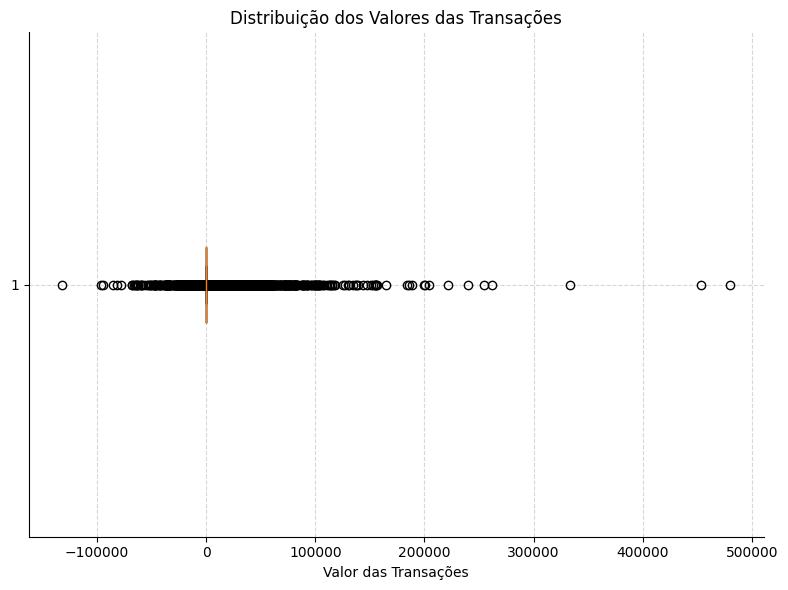

In [184]:
# Resumo estatístico das transações financeiras
print(df_transacoes['valor_transacao'].describe())

# Gráfico de boxplot para visualizar a distribuição dos valores das transações
plt.figure(figsize=(8, 6))
plt.boxplot(df_transacoes['valor_transacao'], vert=False)
plt.title('Distribuição dos Valores das Transações')
plt.xlabel('Valor das Transações')
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

**Contagem e Tipos de Transações**


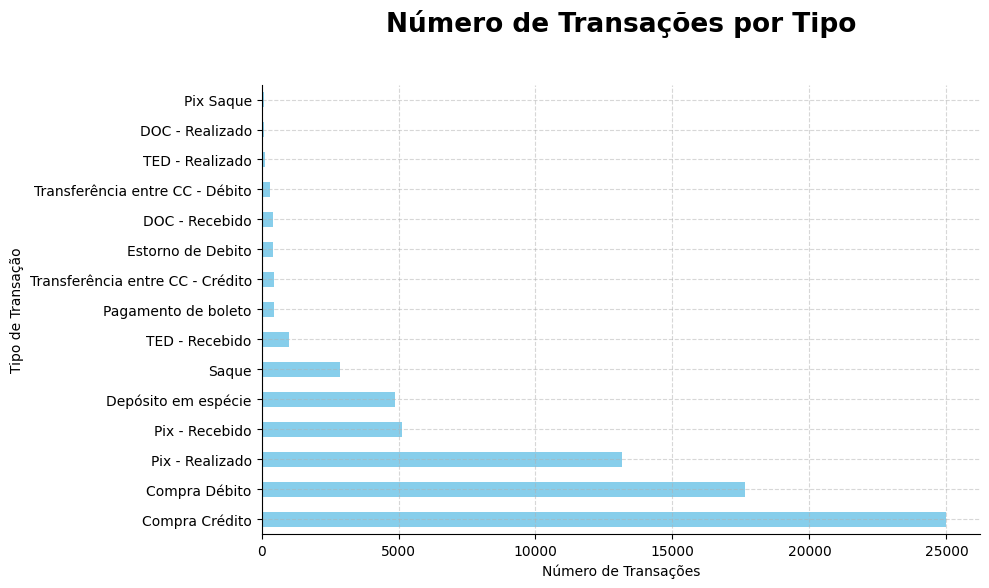

In [207]:
# Agrupar por mês e contar o número de transações
df_transacoes['data_transacao'] = pd.to_datetime(df_transacoes['data_transacao'], format='%Y-%m-%d %H:%M:%S.%f %Z', utc=True, errors='coerce')

# Contagem de tipos de transações únicas
tipos_transacoes = df_transacoes['nome_transacao'].value_counts()

# Plotar gráfico de barras horizontais
plt.figure(figsize=(10, 6))
tipos_transacoes.plot(kind='barh', color='skyblue')
plt.title('Número de Transações por Tipo', y=1.1, fontweight='bold', fontsize=19)
plt.xlabel('Número de Transações')
plt.ylabel('Tipo de Transação')
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


**Análise de tendências ou padrões nas transações ao longo do tempo**


In [197]:
# Convertendo a coluna 'data_transacao' para datetime, lidando com o formato variável
df_transacoes['data_transacao'] = pd.to_datetime(df_transacoes['data_transacao'], format='%Y-%m-%d %H:%M:%S.%f %Z', utc=True, errors='coerce')

# Encontrar a última data de transação registrada
ultima_data_transacao = df_transacoes['data_transacao'].max()

print("Última data de transação registrada:", ultima_data_transacao)

Última data de transação registrada: 2023-01-15 15:57:23.974201+00:00


In [198]:
# Removendo linhas com datas inválidas
df_transacoes = df_transacoes.dropna(subset=['data_transacao'])

# Configurar a coluna 'data_transacao' como índice do DataFrame para facilitar a análise temporal
df_transacoes.set_index('data_transacao', inplace=True)

Contagem de Transações por Período (Mês)

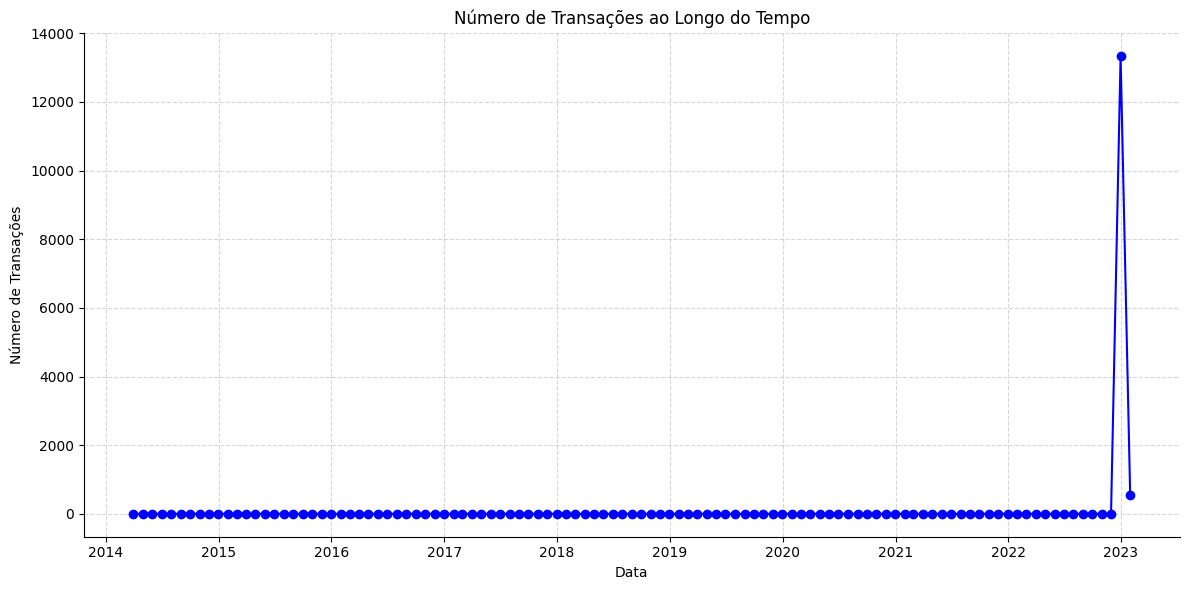

In [199]:
# Agrupar as transações por mês e contar o número de transações
transacoes_por_mes = df_transacoes.resample('M')['cod_transacao'].count()

# Plotar gráfico de linha para visualizar a tendência temporal
plt.figure(figsize=(12, 6))
plt.plot(transacoes_por_mes.index, transacoes_por_mes.values, marker='o', linestyle='-', color='blue')
plt.title('Número de Transações ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Transações')
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

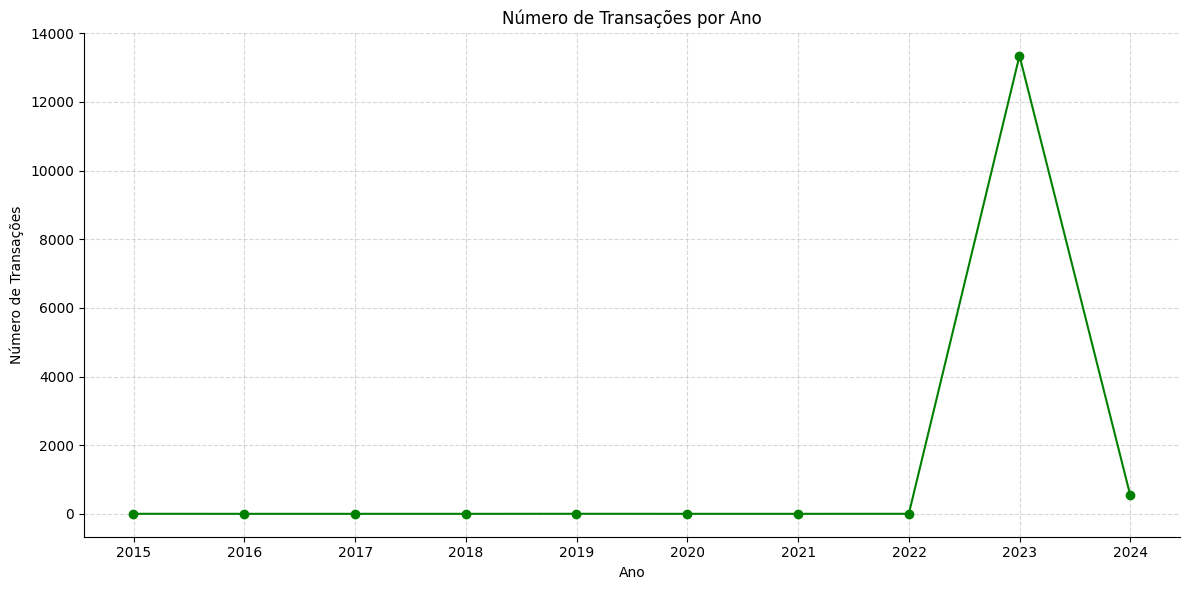

In [200]:
# Agrupar as transações por ano e contar o número de transações
transacoes_por_ano = df_transacoes.resample('Y')['cod_transacao'].count()

# Plotar gráfico de linha para visualizar a tendência temporal por ano
plt.figure(figsize=(12, 6))
plt.plot(transacoes_por_ano.index, transacoes_por_ano.values, marker='o', linestyle='-', color='green')
plt.title('Número de Transações por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Transações')
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


**Análise de Correlação**


Vamos verificar se há correlações entre variáveis como valor da transação e tipo de transação.

In [211]:
# Converter variável categórica nome_transacao em variáveis dummy
df_dummies = pd.get_dummies(df_transacoes['nome_transacao'], prefix='transacao')

# Concatenar as variáveis dummy ao dataframe original
df_with_dummies = pd.concat([df_transacoes, df_dummies], axis=1)

# Verificar as colunas presentes no DataFrame df_with_dummies
print(df_with_dummies.columns)

Index(['cod_transacao', 'num_conta', 'data_transacao', 'nome_transacao',
       'valor_transacao', 'transacao_Compra Crédito',
       'transacao_Compra Débito', 'transacao_DOC - Realizado',
       'transacao_DOC - Recebido', 'transacao_Depósito em espécie',
       'transacao_Estorno de Debito', 'transacao_Pagamento de boleto',
       'transacao_Pix - Realizado', 'transacao_Pix - Recebido',
       'transacao_Pix Saque', 'transacao_Saque', 'transacao_TED - Realizado',
       'transacao_TED - Recebido',
       'transacao_Transferência entre CC - Crédito',
       'transacao_Transferência entre CC - Débito'],
      dtype='object')


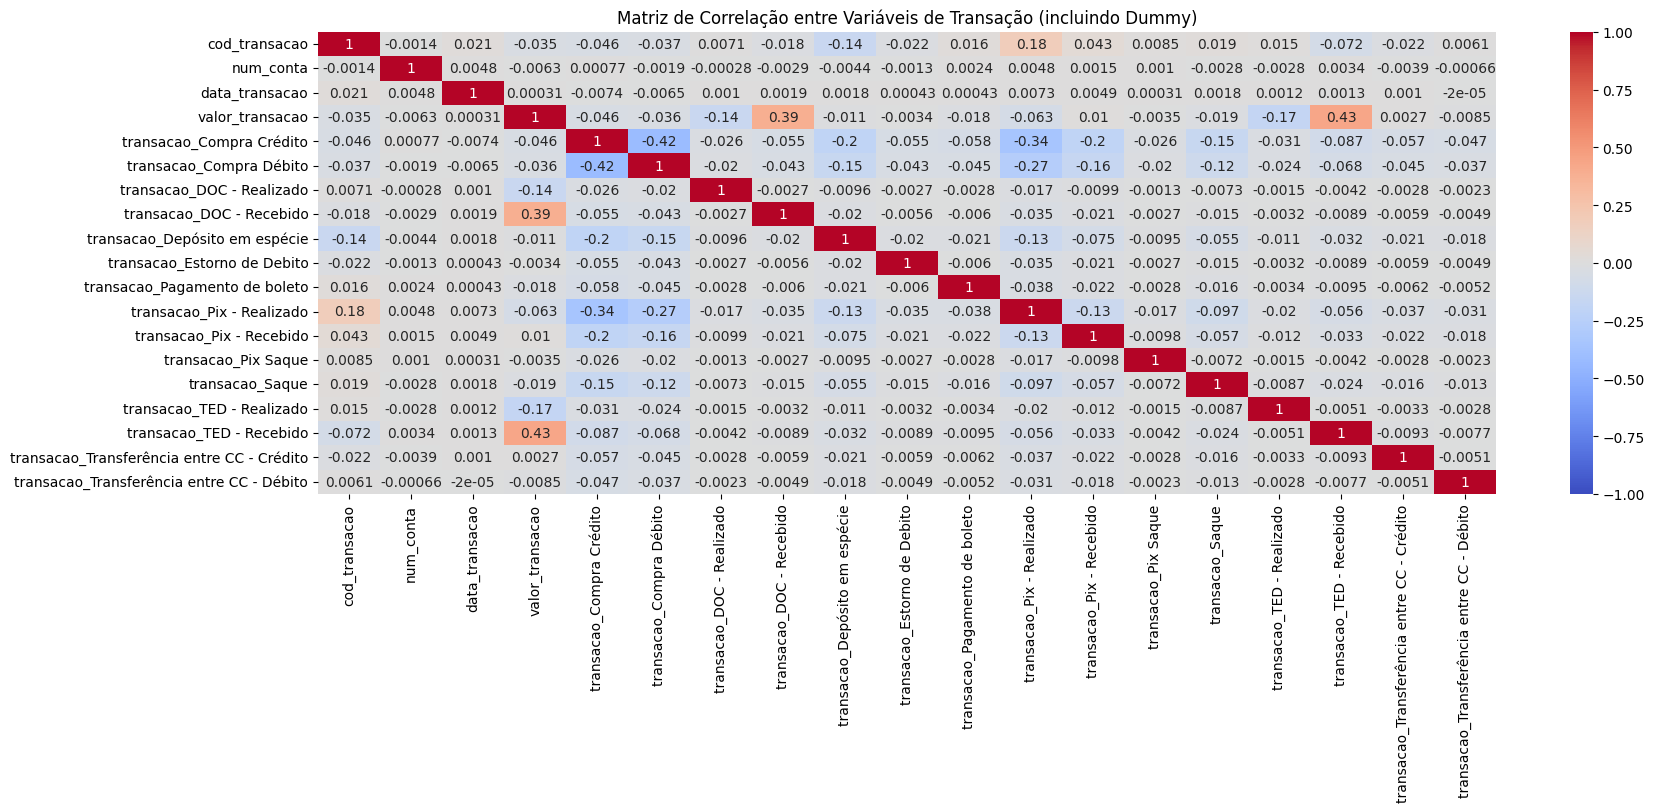

In [217]:
# Selecionar apenas as colunas relevantes incluindo as dummy e numéricas
df_selected_with_dummies = df_with_dummies[['cod_transacao', 'num_conta', 'data_transacao',
       'valor_transacao', 'transacao_Compra Crédito',
       'transacao_Compra Débito', 'transacao_DOC - Realizado',
       'transacao_DOC - Recebido', 'transacao_Depósito em espécie',
       'transacao_Estorno de Debito', 'transacao_Pagamento de boleto',
       'transacao_Pix - Realizado', 'transacao_Pix - Recebido',
       'transacao_Pix Saque', 'transacao_Saque', 'transacao_TED - Realizado',
       'transacao_TED - Recebido',
       'transacao_Transferência entre CC - Crédito',
       'transacao_Transferência entre CC - Débito']]

# Calcular a matriz de correlação
correlation_matrix = df_selected_with_dummies.corr()

# Plotar a matriz de correlação como um heatmap
plt.figure(figsize=(19, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Variáveis de Transação (incluindo Dummy)')
plt.show()